In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy.optimize import curve_fit, minimize

In [3]:
df = pd.read_csv("src/co_2_series.csv", sep=";", comment="#")

In [4]:

df['T'] = df['t'].apply(lambda s: re.match("(-?\d\d?):(\d\d(.\d+)?)", s).groups())

In [5]:
df['s'] = df['T'].apply(lambda t: int(t[0])*60 + float(t[1]))

(array([ 5.5577442 , -8.25733272]), array([0.00758704, 3.09412502]))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
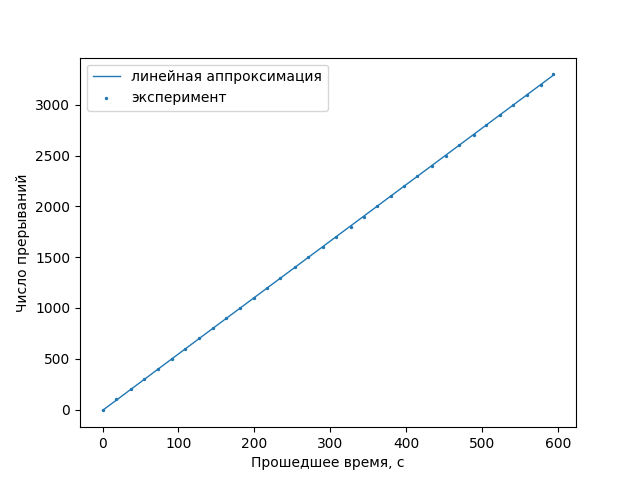

In [6]:
%matplotlib widget

plt.scatter(df['s'], np.arange(0, len(df['s'])) * 100, s=2, label="эксперимент")

f = lambda x, a, b: a*x + b
res, err = curve_fit(f, df['s'][10:],  np.arange(10, len(df['s'])) * 100, maxfev=10_000)

plt.plot(df['s'], f(df['s'], *res), lw=1, label="линейная аппроксимация")
plt.ylabel("Число прерываний")
plt.xlabel("Прошедшее время, с")
plt.legend()
plt.savefig("CO2.png", dpi=300)

res, np.sqrt(np.diag(err))

In [7]:
5.5577442 # 2ν = N/t = 2/T; T = 2/(2ν)
2/5.5577442

0.35985823169047615

In [8]:
5 + None

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

0.05063291139240506 308.48333333333335 443.0
0.10126582278481013 571.919014084507 658.0
1.0046511627906978


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
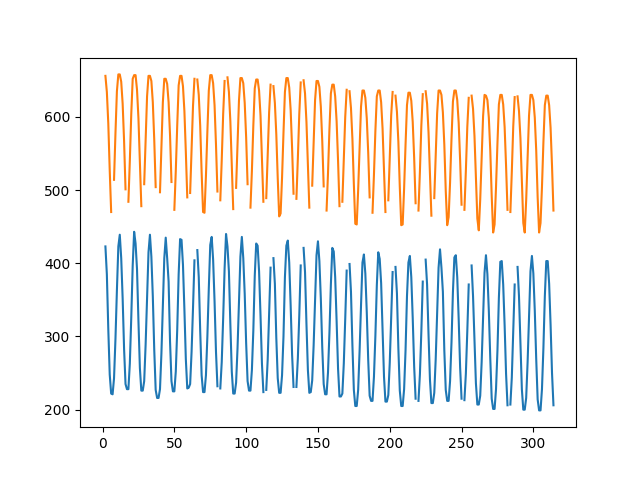

0.37823834196891193 339.3958333333333 409.0
0.17487046632124353 587.3029827315542 647.0
0.5336134453781513


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
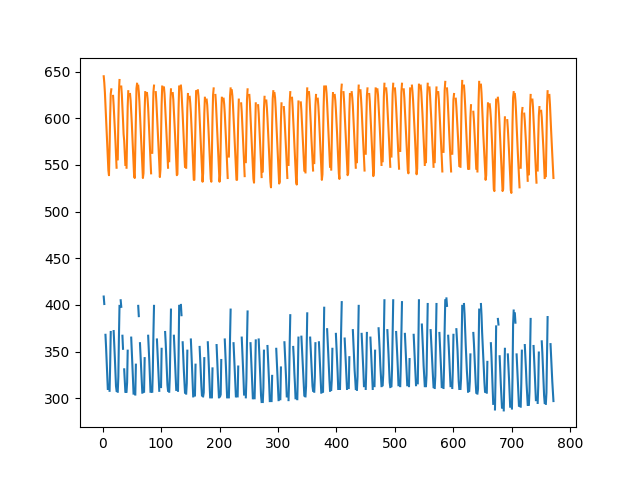

0.1774891774891775 397.5157894736842 467.0
0.12987012987012986 619.5398009950248 674.0
0.6086956521739131


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
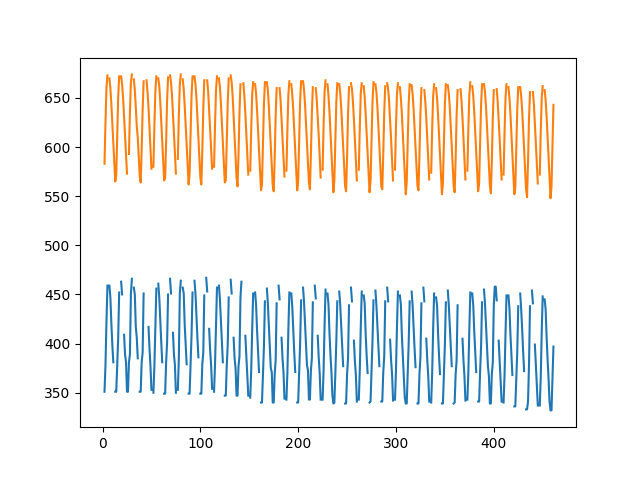

0.0738255033557047 384.286231884058 502.0
0.20469798657718122 615.9388185654009 704.0
1.0247524752475248


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
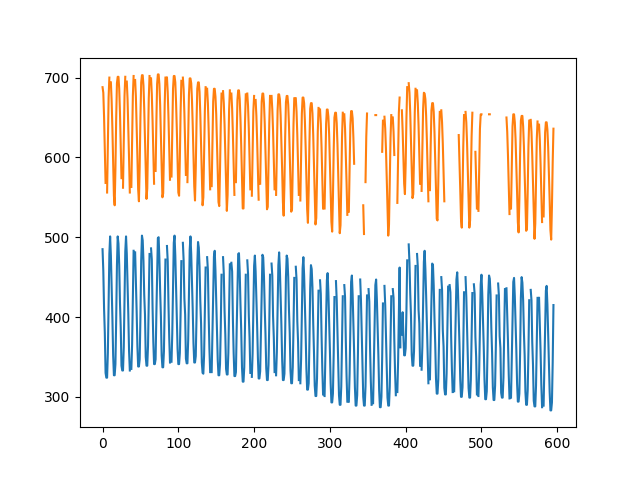

0.04830917874396135 394.83756345177665 551.0
0.10305958132045089 642.4973070017953 750.0
1.4371859296482412


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
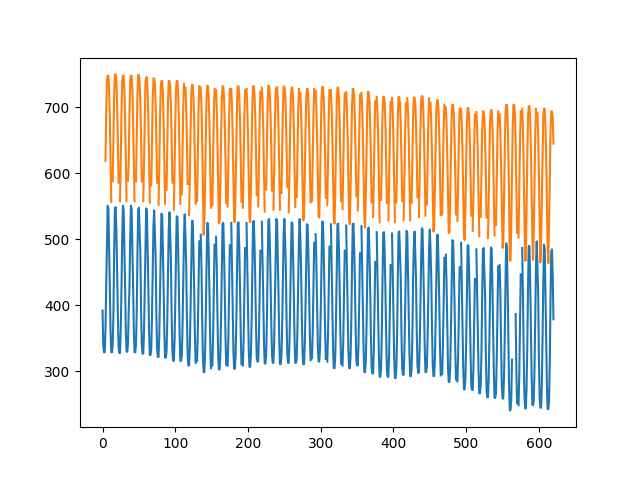

0.05063291139240506 308.48333333333335 443.0
0.10126582278481013 571.919014084507 658.0
1.0046511627906978


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
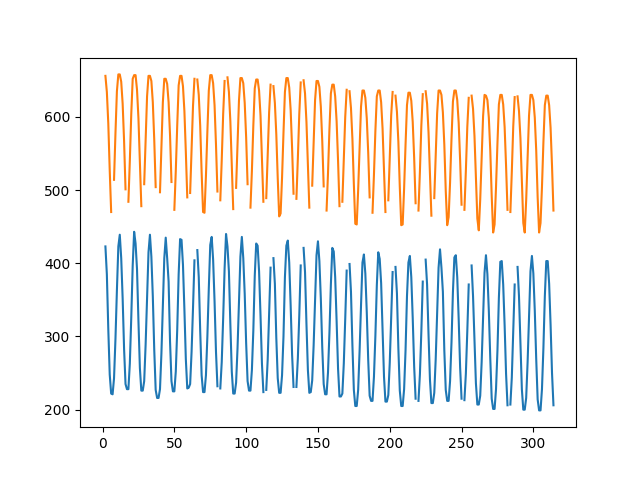

In [77]:
coords = []
for i in range(5542, 5548):
    bott = pd.read_csv(f"src/air_amp/IMG_{i}_bottom.csv", sep=";", comment="#")
    top = pd.read_csv(f"src/air_amp/IMG_{i}_top.csv", sep=";", comment="#")
    coords.append((bott, top))

def count_none(arr):
    return ((arr!=arr).sum(axis=0)/arr.size)[0]

def count_cross(arr, c):
    arr_n = arr - c
    return ((arr_n[:-1] * arr_n[1:]) < 0).sum()

fps = 30
time = []
amps = []

%matplotlib widget
for i in coords:
    
    bott = np.array(i[0]).flatten()
    top = np.array(i[1]).flatten()
    bott_n = bott[~np.isnan(bott)]
    top_n = top[~np.isnan(top)]
    
    print(count_none(i[0]), np.average(bott_n), np.max(bott_n))
    print(count_none(i[1]), np.average(top_n), np.max(top_n))
    print((np.max(top_n) - np.min(top_n))/(np.max(top_n) - np.max(bott_n)))

    time.append(2*(200/fps)/(count_cross(top[:200][~np.isnan(top[:200])], np.average(top[:200][~np.isnan(top[:200])]))))
     # per 200 frames => *(200/fps)/crosses · 2 → T
    amps.append((np.max(top_n) - np.min(top_n))/(np.max(top_n) - np.max(bott_n)))
    
    plt.figure()
    plt.plot(i[0])
    plt.plot(i[1])
    plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
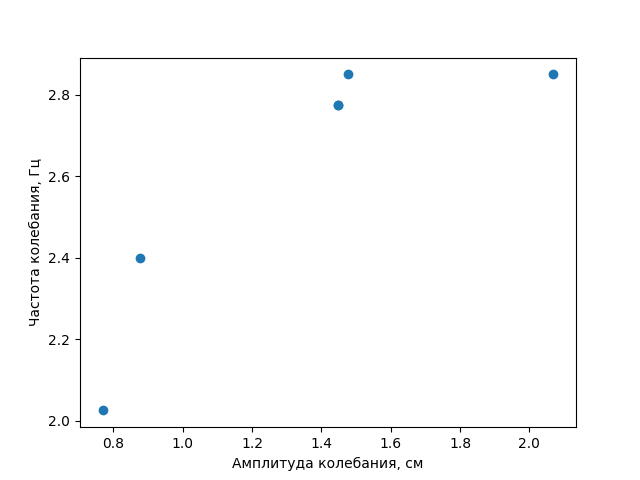

In [78]:
%matplotlib widget
plt.scatter(np.array(amps)/2*2.4*1.2, 1/np.array(time))
plt.xlabel("Амплитуда колебания, см")
plt.ylabel("Частота колебания, Гц")
plt.show()

In [79]:
count_cross(np.array([-1, 1, -2]), 0)

2

In [80]:
1/0.367

2.7247956403269757

In [81]:
np.array(i[0]).flatten()

array([330.,  nan, 423., 385., 310., 248., 222., 221., 243., 297., 363.,
       423., 439., 407., 352., 283., 235., 228., 228., 263., 326., 397.,
       443., 427., 392., 321., 257., 226., 226., 239., 289., 353., 415.,
       439., 409., 355., 282., 227., 216., 216., 228., 277., 343., 407.,
       435., 407., 375., 293., 239., 225., 225., 252., 309., 385., 433.,
       432., 398., 337., 269., 229., 230., 235., 279., 339., 404.,  nan,
       418., 381., 308., 247., 224., 224., 247., 300., 366., 425., 436.,
       405., 348., 279., 232.,  nan, 229., 265., 325., 393., 440., 423.,
       389., 317., 252., 222., 222., 237., 284., 347., 409., 436., 407.,
       358., 291., 239., 226., 226., 254., 308., 383., 427., 424., 389.,
       329., 263., 224.,  nan, 227., 268., 329., 394.,  nan, 407., 372.,
       298., 243., 223., 223., 247., 300., 381., 424., 431., 401., 342.,
       275., 231.,  nan, 231., 270., 329., 397.,  nan, 421., 388., 317.,
       254., 223., 224., 240., 288., 350., 411., 43

In [82]:
len(bott)

316